# TASK3 = CAR PRICE PREDICTION WITH MACHINE LEARNING


The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. 

Car price prediction is one of the major research areas in machine learning. 

So if you want to learn how to train a car price prediction model then this project is for you.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


<AxesSubplot:xlabel='Selling_Price'>

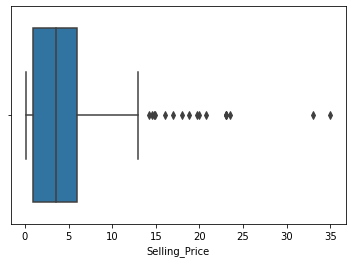

In [12]:
sns.boxplot(x=df['Selling_Price'])

In [15]:
percentile=np.percentile(df["Selling_Price"],75)

In [17]:
sum(df["Selling_Price"]>percentile)

74

In [18]:
# There are 74 cars out of 301 which have Selling Price > 75th Percentile.

<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

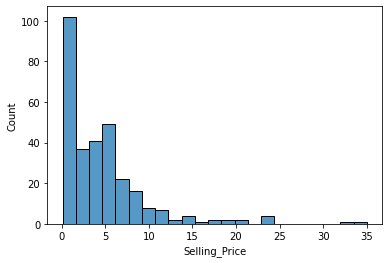

In [19]:
sns.histplot(df["Selling_Price"])

<AxesSubplot:xlabel='Present_Price'>

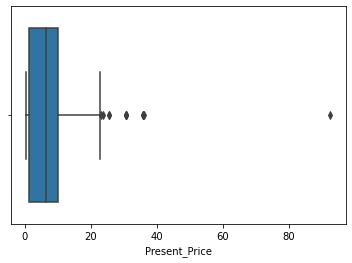

In [13]:
sns.boxplot(x=df['Present_Price'])

<AxesSubplot:xlabel='Present_Price', ylabel='Count'>

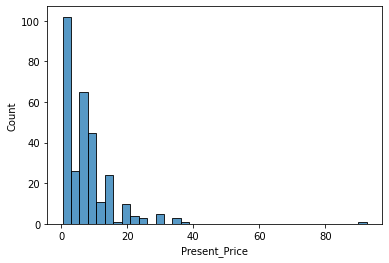

In [20]:
sns.histplot(df["Present_Price"])

<AxesSubplot:xlabel='Driven_kms'>

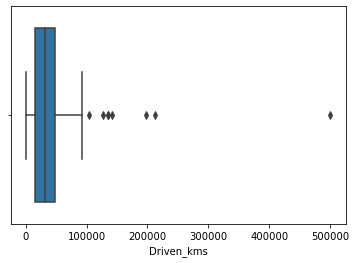

In [14]:
sns.boxplot(x=df['Driven_kms'])

In [22]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

C:\Users\91983\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

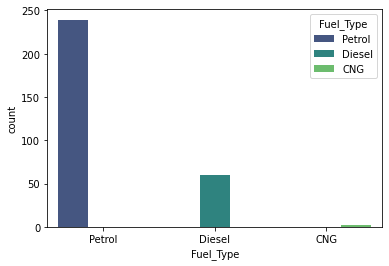

In [34]:
sns.countplot(df["Fuel_Type"],hue=df["Fuel_Type"],palette='viridis')
     

In [39]:
top10 = df['Car_Name'].value_counts().nlargest(10)

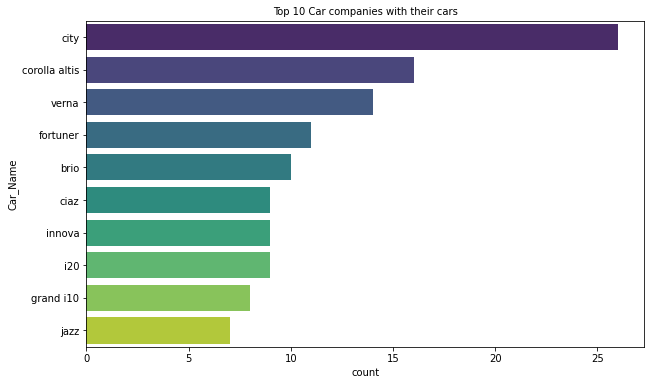

In [42]:
plt.figure(figsize = (10, 6))
sns.countplot(y = df.Car_Name,order=top10.index, palette='viridis')
plt.title("Top 10 Car companies with their cars", fontsize = 10)
plt.show()

In [43]:
# Categorical columns
df.select_dtypes(include=['object']).columns     

Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')

In [45]:
# Numerical columns
df.select_dtypes(exclude=['object']).columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')

In [47]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [48]:
label_encoder = LabelEncoder()

# Lets convert the categorical columns to numerical using LabelEncoder

df['Car_Name'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [49]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train_scaled

array([[-1.5478145 ,  0.17353497, -0.73372919, ...,  1.29099445,
         0.3992747 , -0.19618312],
       [-0.90584203, -0.15965217, -0.68759295, ...,  1.29099445,
         0.3992747 , -0.19618312],
       [ 0.30257673,  0.83990926,  0.22842933, ..., -0.77459667,
         0.3992747 , -0.19618312],
       ...,
       [ 0.56691833,  0.17353497,  0.28986985, ..., -0.77459667,
         0.3992747 , -0.19618312],
       [ 0.30257673, -1.49240076,  0.29545535, ..., -0.77459667,
         0.3992747 , -0.19618312],
       [ 0.86902303, -1.15921361, -0.06313386, ..., -0.77459667,
         0.3992747 ,  3.42565907]])

In [59]:
X_test_scaled

array([[ 0.18928747,  1.17309641, -0.17372679, -0.46069961,  0.50832459,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.60468142,  0.17353497,  0.17592562,  1.06907276, -1.79352262,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.52915525,  1.17309641, -0.2150595 ,  0.00511607,  0.50832459,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.56691833,  0.83990926,  0.38370628,  0.11296502, -1.79352262,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.49139216,  0.50672212,  0.83054642,  0.12575297, -1.79352262,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.30257673, -0.15965217,  0.28428435,  0.44045583,  0.50832459,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.86902303,  1.17309641,  0.08320629, -0.83274504,  0.50832459,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 1.35994315,  1.17309641, -0.02515245, -0.61656908,  0.50832459,
        -0.77459667,  0.3992747 , -0.19618312],
       [ 0.45362908,  0.50672212

## Model Building

1] Linear Regression
2] Decision Tree Regressor
3] Random Forest Regressor

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [63]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)

In [64]:
# Decision Tree Regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train_scaled, y_train)
decision_tree_pred = decision_tree_reg.predict(X_test_scaled)

In [65]:
# Random Forest Regressor
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
random_forest_pred = random_forest_reg.predict(X_test_scaled)

In [66]:
# Lets evaluate the models

In [67]:
models = {'Linear Regression': linear_reg, 'Decision Tree Regressor': decision_tree_reg,
          'Random Forest Regressor': random_forest_reg,}
for name, model in models.items():
    predictions = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'{name} - Mean Squared Error: {mse}, R-squared: {r2}')

Linear Regression - Mean Squared Error: 6.507819977947047, R-squared: 0.7688828477496815
Decision Tree Regressor - Mean Squared Error: 2.2728442622950817, R-squared: 0.9192827559474342
Random Forest Regressor - Mean Squared Error: 3.4803063719672105, R-squared: 0.8764012372233072
